**DATA ANALYSIS**

In [33]:
import zipfile
import os

zip_path = 'data/test-export new.zip'
extract_to_dir = 'data'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_dir)

print(f"Files extracted to {extract_to_dir}")


Files extracted to data


In [34]:
import json


info_labels_path = 'data/info.labels'

# Function to load information from the info.labels file
def load_info_labels(info_labels_path):
    with open(info_labels_path, 'r') as f:
        info_labels = json.load(f)
    return info_labels

# Loading information from the info.labels file
info_labels = load_info_labels(info_labels_path)

# List to store unique labels
unique_labels = []

# Iterating through the files in info.labels
for file_info in info_labels['files']:
    label = file_info['label']['label']
    if label not in unique_labels:
        unique_labels.append(label)

# Displaying unique labels
print("The unique labels are: ", unique_labels)


The unique labels are:  ['up', 'down', 'right', 'left', 'forward', 'backward', 'stop', 'x-circle right', 'x-circle left', 'xcircle left', 'xcircle right']


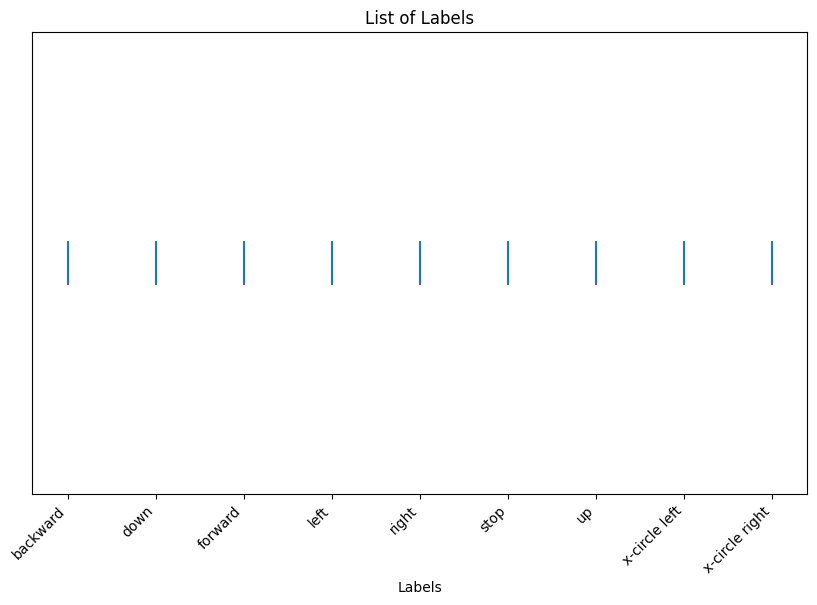

In [35]:
import json
import matplotlib.pyplot as plt

# List of label names in the specified order
label_names = ['backward', 'down', 'forward', 'left', 'right', 'stop', 'up', 'x-circle left', 'x-circle right']

# Creating a list of x-axis positions for the unique labels
x_positions = range(len(label_names))

# Plotting the labels
plt.figure(figsize=(10, 6))
plt.scatter(x_positions, [0] * len(label_names), marker='|', s=1000)
plt.xticks(x_positions, label_names, rotation=45, ha='right')
plt.yticks([])  # Removing ticks on the y-axis
plt.title('List of Labels')
plt.xlabel('Labels')
plt.show()


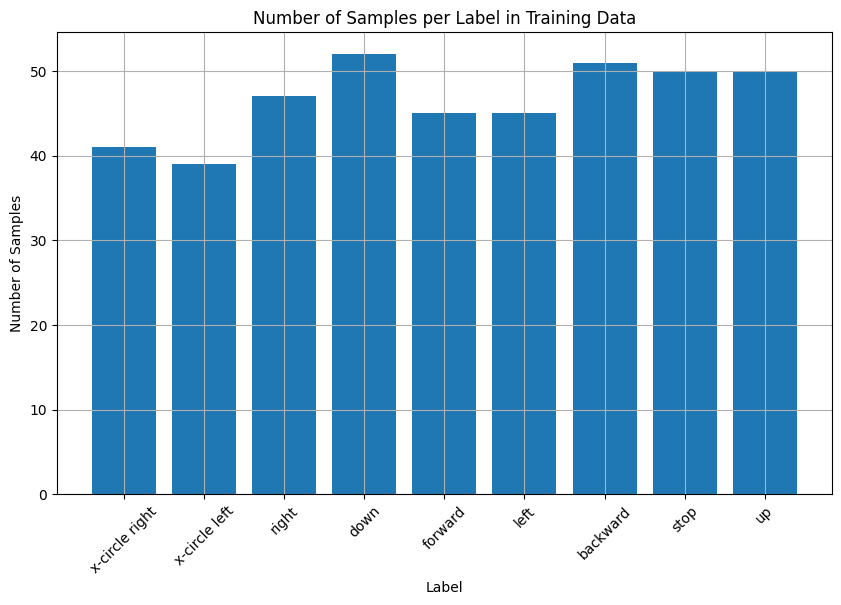

Total number of samples in the training set: 420


In [36]:
import os
import re
import json
import matplotlib.pyplot as plt

# Path to the training directory
training_dir = 'data/training'

# Lists to store data file names and labels
training_files = [file for file in os.listdir(training_dir) if file.endswith('.json')]
training_labels = []

# Regular expression pattern to extract label from file name
pattern = r'^(.+?)\.'

# Iterating through file names
for file in training_files:
    match = re.match(pattern, file)
    if match:
        label = match.group(1)  # Retrieve label from the first capturing group in the regular expression
        training_labels.append(label)

# Counting the number of samples per label
samples_per_label = {}
for label in training_labels:
    if label in samples_per_label:
        samples_per_label[label] += 1
    else:
        samples_per_label[label] = 1

# Plotting the number of samples per label
plt.figure(figsize=(10, 6))
plt.bar(samples_per_label.keys(), samples_per_label.values())
plt.xlabel('Label')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Label in Training Data')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Displaying the total number of samples
total_samples_training = len(training_labels)
print("Total number of samples in the training set:", total_samples_training)


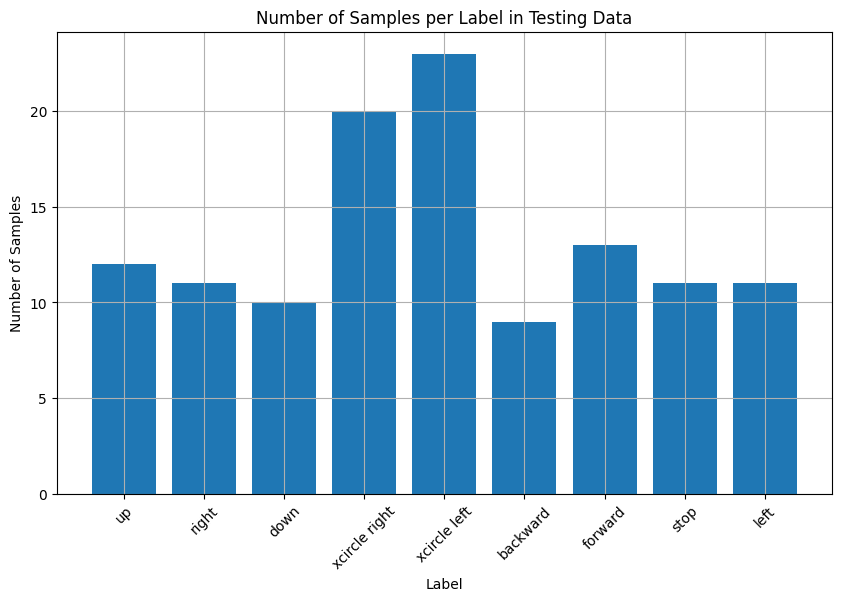

Total number of samples in the testing set: 120


In [37]:
import os
import re
import json
import matplotlib.pyplot as plt

# Path to the testing directory
testing_dir = 'data/testing'

# Lists to store data file names and labels
testing_files = [file for file in os.listdir(testing_dir) if file.endswith('.json')]
testing_labels = []

# Regular expression pattern to extract label from file name (REGEX)
pattern = r'^(.+?)\.'

# Iterating through file names
for file in testing_files:
    match = re.match(pattern, file)
    if match:
        label = match.group(1).replace('-', '')  # Retrieve label and remove hyphens
        testing_labels.append(label)

# Combine 'xcircle' and 'x-circle' into one label
testing_labels = [label if label != 'x-circle' else 'xcircle' for label in testing_labels]

# Counting the number of samples per label
samples_per_label = {}
for label in testing_labels:
    if label in samples_per_label:
        samples_per_label[label] += 1
    else:
        samples_per_label[label] = 1

# Plotting the number of samples per label
plt.figure(figsize=(10, 6))
plt.bar(samples_per_label.keys(), samples_per_label.values())
plt.xlabel('Label')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Label in Testing Data')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Displaying the total number of samples
total_samples_test = len(testing_labels)
print("Total number of samples in the testing set:", total_samples_test)


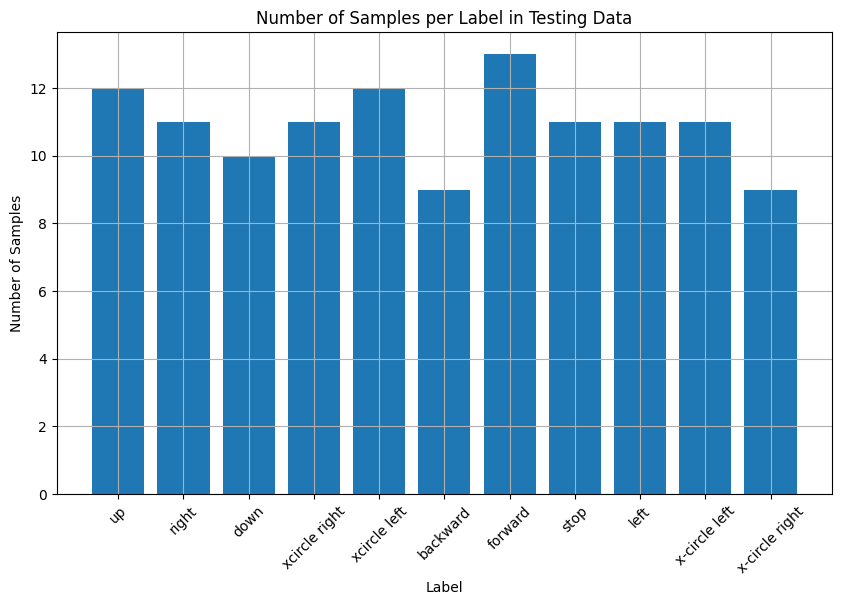

Total number of samples in the testing set: 120


In [38]:
import os
import re
import json
import matplotlib.pyplot as plt

# Path to the testing directory
testing_dir = 'data/testing'

# Lists to store data file names and labels
testing_files = [file for file in os.listdir(testing_dir) if file.endswith('.json')]
testing_labels = []

# Regular expression pattern to extract label from file name
pattern = r'^(.+?)\.'

# Iterating through file names
for file in testing_files:
    match = re.match(pattern, file)
    if match:
        label = match.group(1)  # Retrieve label from the first capturing group in the regular expression
        testing_labels.append(label)

# Counting the number of samples per label
samples_per_label = {}
for label in testing_labels:
    if label in samples_per_label:
        samples_per_label[label] += 1
    else:
        samples_per_label[label] = 1

# Plotting the number of samples per label
plt.figure(figsize=(10, 6))
plt.bar(samples_per_label.keys(), samples_per_label.values())
plt.xlabel('Label')
plt.ylabel('Number of Samples')
plt.title('Number of Samples per Label in Testing Data')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Displaying the total number of samples
total_samples_testing = len(testing_labels)
print("Total number of samples in the testing set:", total_samples_testing)


**Pre-processing**

In [39]:
import os
import shutil

data_dir = 'data'  
training_dir = os.path.join(data_dir, 'training')

# Check if the directory exists
if not os.path.exists(training_dir):
    print(f"The directory {training_dir} does not exist.")
else:
    # List all files in the training directory
    json_files = [f for f in os.listdir(training_dir) if f.endswith('.json')]
    
    # Process each file
    for file_name in json_files:
        # Extract the label from the filename
        label = file_name.split('.')[0]
        
        # Create a directory for the label if it does not exist
        label_dir = os.path.join(training_dir, label)
        if not os.path.exists(label_dir):
            os.makedirs(label_dir)
        
        # Move the file to the corresponding label directory
        src_file_path = os.path.join(training_dir, file_name)
        dst_file_path = os.path.join(label_dir, file_name)
        shutil.move(src_file_path, dst_file_path)
    
    print("Files have been organized into labeled directories.")

Files have been organized into labeled directories.


**Feature extraction**

In [40]:
import os
import json
import numpy as np
from glob import glob
from scipy import signal
from scipy.stats import skew, kurtosis, entropy
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

data_dir = 'data/training'  

# Function to extract features from accelerometer data
def extract_features(acceleration_data):
    mean = np.mean(acceleration_data, axis=0)
    std = np.std(acceleration_data, axis=0)
    var = np.var(acceleration_data, axis=0)
    median = np.median(acceleration_data, axis=0)
    max_value = np.max(acceleration_data, axis=0)
    min_value = np.min(acceleration_data, axis=0)
    rms = np.sqrt(np.mean(acceleration_data**2, axis=0))
    skewness = skew(acceleration_data, axis=0)
    kurt = kurtosis(acceleration_data, axis=0)
    f, Pxx = signal.periodogram(acceleration_data, axis=0)
    max_power_freq = f[np.argmax(Pxx, axis=0)]
    spectral_entropy = entropy(Pxx, axis=0)
    
    # Additional features examples
    energy = np.sum(acceleration_data ** 2, axis=0)  # Total energy
    max_abs_diff = np.max(np.abs(np.diff(acceleration_data, axis=0)), axis=0)  # Maximal absolute difference
    abs_diff_mean = np.mean(np.abs(np.diff(acceleration_data, axis=0)), axis=0)  # Mean absolute difference

    features = np.concatenate((mean, std, var, median, max_value, min_value, rms, skewness, kurt, max_power_freq, spectral_entropy, energy, max_abs_diff, abs_diff_mean))
    return features



In [41]:
# Function for data preprocessing
def preprocess_acceleration_data(data):
    return signal.detrend(data, axis=0)

# Load and process data
extracted_features = []
labels = []

# Process each label directory
label_dirs = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
for label in label_dirs:
    label_path = os.path.join(data_dir, label)
    json_files = glob(os.path.join(label_path, '*.json'))
    for file_path in json_files:
        with open(file_path, 'r') as file:
            content = json.load(file)
            values = np.array(content['payload']['values'])
            preprocessed_data = preprocess_acceleration_data(values)
            features = extract_features(preprocessed_data)
            extracted_features.append(features)
            labels.append(label)

In [42]:

# Encode labels and prepare the data
X = np.array(extracted_features)
y = LabelEncoder().fit_transform(labels)

# Print extracted features and shape
print("Extracted Features:")
print(X)
print("Shape of Feature Matrix:", X.shape)

Extracted Features:
[[ 1.46081977e-16 -1.04996421e-16 -3.06479988e-15 ...  7.92993184e-01
   2.44723709e-01  5.85783493e-01]
 [ 1.85403581e-16 -7.13125928e-17 -1.06405533e-15 ...  1.79799473e+00
   3.98563321e-01  4.48656687e-02]
 [-1.95113452e-16 -5.24424655e-18 -8.88178420e-16 ...  1.38599499e+00
   3.30440912e-01  4.66441895e-02]
 ...
 [ 8.73618118e-18  1.10658295e-16  1.49534301e-15 ...  6.95694738e-01
   6.56964479e-01  6.68163364e-01]
 [-2.46473158e-16  3.94502894e-16  1.12152579e-15 ...  9.67573496e-01
   8.92110328e-01  1.34261562e+00]
 [ 2.47120019e-17 -5.64560219e-16  1.37078928e-15 ...  1.05517219e+00
   8.23611033e-01  1.19119297e+00]]
Shape of Feature Matrix: (420, 42)


**Training & Hyperparameter tuning**

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data_dir = 'data/training'



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalization of the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameters to tune
learning_rates = [0.001, 0.01, 0.1]
neurons = [32, 64, 128]
dropout_rates = [0.2, 0.3, 0.4]
batch_sizes = [16, 32, 64]

best_accuracy = 0
best_hyperparams = {}

# Hyperparameter tuning loop
for lr in learning_rates:
    for n in neurons:
        for dropout_rate in dropout_rates:
            for batch_size in batch_sizes:
                # Defining the neural network model
                model = Sequential([
                    Dense(n, activation='relu', input_shape=(X_train_scaled.shape[1],)),
                    Dropout(dropout_rate),
                    Dense(n//2, activation='relu'),
                    Dropout(dropout_rate),
                    Dense(len(np.unique(y_train)), activation='softmax')
                ])

                # Compile the model
                model.compile(optimizer=Adam(learning_rate=lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

                # Train the model
                history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=batch_size, validation_data=(X_test_scaled, y_test), verbose=0)

                # Evaluate the model
                val_loss, val_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

                # Check if this set of hyperparameters has better accuracy
                if val_accuracy > best_accuracy:
                    best_accuracy = val_accuracy
                    best_hyperparams = {'learning_rate': lr, 'neurons': n, 'dropout_rate': dropout_rate, 'batch_size': batch_size}

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:")
print(best_hyperparams)
print("Best Accuracy:", best_accuracy)


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Hyperparameters:
{'learning_rate': 0.001, 'neurons': 128, 'dropout_rate': 0.4, 'batch_size': 16}
Best Accuracy: 0.9285714030265808


In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

data_dir = 'data/training'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalization of the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define hyperparameters
learning_rate = 0.001
neurons = 64
dropout_rate = 0.3
batch_size = 64

# Defining the neural network model with specified hyperparameters
model = Sequential([
    Dense(neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(dropout_rate),
    Dense(neurons // 2, activation='relu'),
    Dropout(dropout_rate),
    Dense(len(np.unique(y_train)), activation='softmax')
])

# Compile the model with the specified learning rate
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=batch_size,
                    validation_data=(X_test_scaled, y_test), verbose=1)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


Epoch 1/100


/opt/homebrew/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1129 - loss: 2.5584 - val_accuracy: 0.2262 - val_loss: 2.0746
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1698 - loss: 2.2424 - val_accuracy: 0.3810 - val_loss: 1.8752
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3268 - loss: 1.9280 - val_accuracy: 0.5476 - val_loss: 1.7133
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4219 - loss: 1.7543 - val_accuracy: 0.5833 - val_loss: 1.5707
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3911 - loss: 1.7469 - val_accuracy: 0.6071 - val_loss: 1.4410
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4483 - loss: 1.5610 - val_accuracy: 0.6429 - val_loss: 1.3281
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5041 - loss: 1.4098 - val_accuracy: 0.6548 - val_loss: 1.2243
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5276 - loss: 1.3324 - val_accuracy: 0.6548 - val_loss: 1.1338
Epoch 9/100

In [45]:
# Saving the model 
from tensorflow.keras.models import save_model
save_model(model, 'model.keras')

**Testing**

In [46]:
import os
import json
import numpy as np
from glob import glob
from scipy import signal
from scipy.stats import skew, kurtosis, entropy
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('model.keras') 

# Load the scaler and label_encoder
scaler = StandardScaler()
scaler = scaler.fit(X_train)  
label_encoder = LabelEncoder()
label_encoder = label_encoder.fit(y_train)  

# Define the path to the test folder containing JSON files
test_data_dir = 'data/testing' 

# Load and preprocess data from each JSON file in the test folder
extracted_test_features = []
file_names = []

json_files = glob(os.path.join(test_data_dir, '*.json'))
for file_path in json_files:
    with open(file_path, 'r') as file:
        content = json.load(file)
        values = np.array(content['payload']['values'])
        preprocessed_data = preprocess_acceleration_data(values)
        features = extract_features(preprocessed_data)
        extracted_test_features.append(features)
        file_names.append(os.path.basename(file_path))

# Convert data to numpy array
X_test = np.array(extracted_test_features)

# Normalize test data using the same scaler used during training
X_test_scaled = scaler.transform(X_test)  

# Make predictions with the model
predictions = model.predict(X_test_scaled)

# List of label names
label_names = ['backward', 'down', 'forward', 'left', 'right', 'stop', 'up', 'x-circle left', 'x-circle right']

# Interpret predictions to get the predicted labels
predicted_labels = [label_names[np.argmax(pred)] for pred in predictions]

# Display the predicted labels for each file
for file_name, predicted_label in zip(file_names, predicted_labels):
    print(f"File: {file_name}, Predicted Label: {predicted_label}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
File: up.up .4rc00bjc.ingestion-848d69cd95-ttl72.json, Predicted Label: up
File: right.4rc1rohm.ingestion-848d69cd95-ttl72.json, Predicted Label: left
File: down.4rc0odan.ingestion-848d69cd95-sqbhb.json, Predicted Label: down
File: xcircle right.xcircle right .4p33ove7.ingestion-747dd9454-n7tj6.json.4rcbku0f.ingestion-848d69cd95-lzk2f.json, Predicted Label: x-circle left
File: xcircle left.xcircle left .4p33gtah.ingestion-747dd9454-n7tj6.json.4rcbt5p5.ingestion-848d69cd95-sqbhb.json, Predicted Label: x-circle left
File: xcircle right.xcircle right .4p33rf6u.ingestion-747dd9454-g22vx.json.4rcbkusd.ingestion-848d69cd95-ttl72.json, Predicted Label: x-circle left
File: backward.forward.4p32k0vu.ingestion-747dd9454-g22vx.json.4rcbob6i.ingestion-848d69cd95-sqbhb.json, Predicted Label: backward
File: forward.4rc3gb07.ingestion-848d69cd95-ttl72.json, Predicted Label: forward
File: stop.4rc7a3vo.ingestion-848d69cd95-lzk2f.json, Predicted Label: stop
File: f

In [47]:
import csv

output_csv_file = 'predictions.csv'

# Write predictions to the CSV file
with open(output_csv_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['File Name', 'Predicted Label'])  
    for file_name, predicted_label in zip(file_names, predicted_labels):
        writer.writerow([file_name, predicted_label])


**Comparison between true predictions and predictions by the model for the testing part**

In [48]:
import os
import pandas as pd

data_dir = 'data/testing' 

# List to store file names
file_names = []

# Iterate over each JSON file in the test folder
for file_name in os.listdir(data_dir):
    if file_name.endswith('.json'):
        file_names.append(file_name)

# Extract labels from the file name
labels = [file_name.split('.')[0] for file_name in file_names]

# Create a DataFrame from the lists of file names and labels
df_labels = pd.DataFrame({'File Name': file_names, 'Label': labels})

# Display the first few rows of the DataFrame
print(df_labels.head())


                                           File Name          Label
0    up.up .4rc00bjc.ingestion-848d69cd95-ttl72.json             up
1     right.4rc1rohm.ingestion-848d69cd95-ttl72.json          right
2      down.4rc0odan.ingestion-848d69cd95-sqbhb.json           down
3  xcircle right.xcircle right .4p33ove7.ingestio...  xcircle right
4  xcircle left.xcircle left .4p33gtah.ingestion-...   xcircle left


In [49]:
# Path to the output CSV file
csv_path = 'true_predictions.csv'

# Save the DataFrame to a CSV file
df_labels.to_csv(csv_path, index=False)

print(f"The CSV file '{csv_path}' has been successfully created.")


The CSV file 'true_predictions.csv' has been successfully created.


In [50]:
from sklearn.metrics import confusion_matrix

# Load the CSV files containing the true labels and predictions
df_true_labels = pd.read_csv('true_predictions.csv')
df_predicted_labels = pd.read_csv('predictions.csv')

# Merge the two DataFrames on the file name
df_comparison = pd.merge(df_true_labels, df_predicted_labels, on='File Name')

# Calculate the number of correct predictions
correct_predictions = sum(df_comparison['Label'] == df_comparison['Predicted Label'])

# Calculate accuracy
accuracy = correct_predictions / len(df_comparison)

print(f"Accuracy: {accuracy:.2f}")

# Compute confusion matrix
conf_matrix = confusion_matrix(df_comparison['Label'], df_comparison['Predicted Label'])

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.68
Confusion Matrix:
[[ 7  0  2  0  0  0  0  0  0  0  0]
 [ 0  9  0  0  0  0  1  0  0  0  0]
 [ 6  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  7  4  0  0  0  0  0  0]
 [ 0  0  0  1 10  0  0  0  0  0  0]
 [ 0  0  0  0  0 11  0  0  0  0  0]
 [ 0  1  0  0  0  0 11  0  0  0  0]
 [ 0  0  0  0  0  0  0 10  1  0  0]
 [ 0  0  0  0  0  0  0  0  9  0  0]
 [ 0  0  0  0  0  0  0 12  0  0  0]
 [ 0  0  0  1  0  0  0 10  0  0  0]]


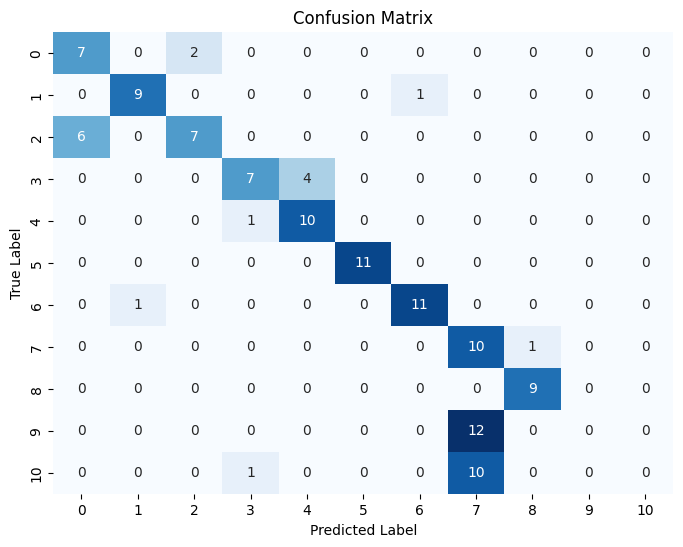

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(df_comparison['Label'], df_comparison['Predicted Label'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
